In [ ]:
print('ss')

In [ ]:
from sentence_transformers import SentenceTransformer
sentences = ["我喜欢你", "我爱你", "我不喜欢你", '我讨厌你', "我非常不喜欢你"]

model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')
# model = SentenceTransformer('sentence-transformers/paraphrase-xlm-r-multilingual-v1')

embeddings = model.encode(sentences)
print(embeddings)


In [ ]:
# 数据处理

import pandas as pd

train_data = pd.read_csv('../data/trainset.csv', sep=';')
test_data = pd.read_csv('../data/testset.csv', sep=';')

train_data = train_data.sample(frac=1.0)
test_data = test_data.sample(frac=1.0)

# 处理标签
labels = train_data.drop_duplicates('label', 'first')['label']
labels = labels.reset_index(drop=True)
labels_map = dict(zip(labels, range(labels.size)))

train_data['num_label'] = train_data['label'].map(str.lower).map(labels_map)
test_data['num_label'] = test_data['label'].map(str.lower).map(labels_map)


In [ ]:
### 采用SVN
from sklearn import svm

print(train_data['sentence'])
X = model.encode(train_data['sentence'].to_list())
y = train_data['num_label'].to_list()
clf = svm.SVC()
clf.fit(X, y)

# 测试
clf.score(model.encode(test_data['sentence'].to_list()), test_data['num_label'].to_list())

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

test_data_embeddings = model.encode(test_data['sentence'].to_list())

y_test = test_data['num_label'].to_list()
y_pred = clf.predict(test_data_embeddings)
labels_list = labels.to_list()
y_test = [labels_list[int(i)] for i in y_test]
y_pred = [labels_list[int(i)] for i in y_pred]

# confusion_matrix(y_test, y_pred, labels=labels_list)
# print(classification_report(y_test, y_pred))


In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# 生成混淆矩阵图片
def plot_confusion_matrix(cm, classes, savename, title='Confusion Matrix'):
    plt.figure(figsize=(16, 12), dpi=100)
    np.set_printoptions(precision=2)

    # 在混淆矩阵中每格的概率值
    ind_array = np.arange(len(classes))
    x, y = np.meshgrid(ind_array, ind_array)
    for x_val, y_val in zip(x.flatten(), y.flatten()):
        c = cm[y_val][x_val]
        if c > 0.001:
            plt.text(x_val, y_val, str(c), color='red',
                     fontsize=12, va='center', ha='center')

    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.binary)
    plt.title(title)
    plt.colorbar()
    xlocations = np.array(range(len(classes)))
    plt.xticks(xlocations, classes, rotation=90)
    plt.yticks(xlocations, classes)
    plt.ylabel('Actual label')
    plt.xlabel('Predict label')

    # offset the tick
    tick_marks = np.array(range(len(classes))) + 0.5
    plt.gca().set_xticks(tick_marks, minor=True)
    plt.gca().set_yticks(tick_marks, minor=True)
    plt.gca().xaxis.set_ticks_position('none')
    plt.gca().yaxis.set_ticks_position('none')
    plt.grid(True, which='minor', linestyle='-')
    plt.gcf().subplots_adjust(bottom=0.15)

    # show confusion matrix
    plt.savefig(savename, format='png')
    plt.show()


In [ ]:
# 获取混淆矩阵
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, labels_list, 'confusion_matrix.png', title='confusion matrix')

In [ ]:
### 采用决策树
from sklearn import tree

X = model.encode(train_data['sentence'].to_list())
y = train_data['num_label'].to_list()
clf = tree.DecisionTreeClassifier()
clf.fit(X, y)

# 测试
clf.score(model.encode(test_data['sentence'].to_list()), test_data['num_label'].to_list())

In [ ]:

y_test = test_data['num_label'].to_list()
y_pred = clf.predict(test_data_embeddings)
labels_list = labels.to_list()
y_test = [labels_list[int(i)] for i in y_test]
y_pred = [labels_list[int(i)] for i in y_pred]

In [ ]:
# 获取混淆矩阵
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(cm, labels_list, 'confusion_matrix.png', title='confusion matrix')

In [91]:
# 朴素贝叶斯
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X, y)

GaussianNB()

              precision    recall  f1-score   support

         app       0.83      0.56      0.67        18
         bus       1.00      0.75      0.86         8
        calc       1.00      1.00      1.00         8
        chat       0.68      0.92      0.78        51
     cinemas       0.30      0.75      0.43         8
    contacts       0.78      0.70      0.74        10
    cookbook       1.00      0.94      0.97        90
    datetime       0.44      0.67      0.53         6
       email       1.00      0.88      0.93         8
         epg       0.68      0.64      0.66        36
      flight       1.00      0.95      0.98        21
      health       1.00      0.94      0.97        18
     lottery       1.00      0.88      0.93         8
         map       0.63      0.96      0.76        23
       match       1.00      1.00      1.00         8
     message       1.00      0.86      0.92        21
       music       0.71      0.55      0.62        22
        news       0.90    

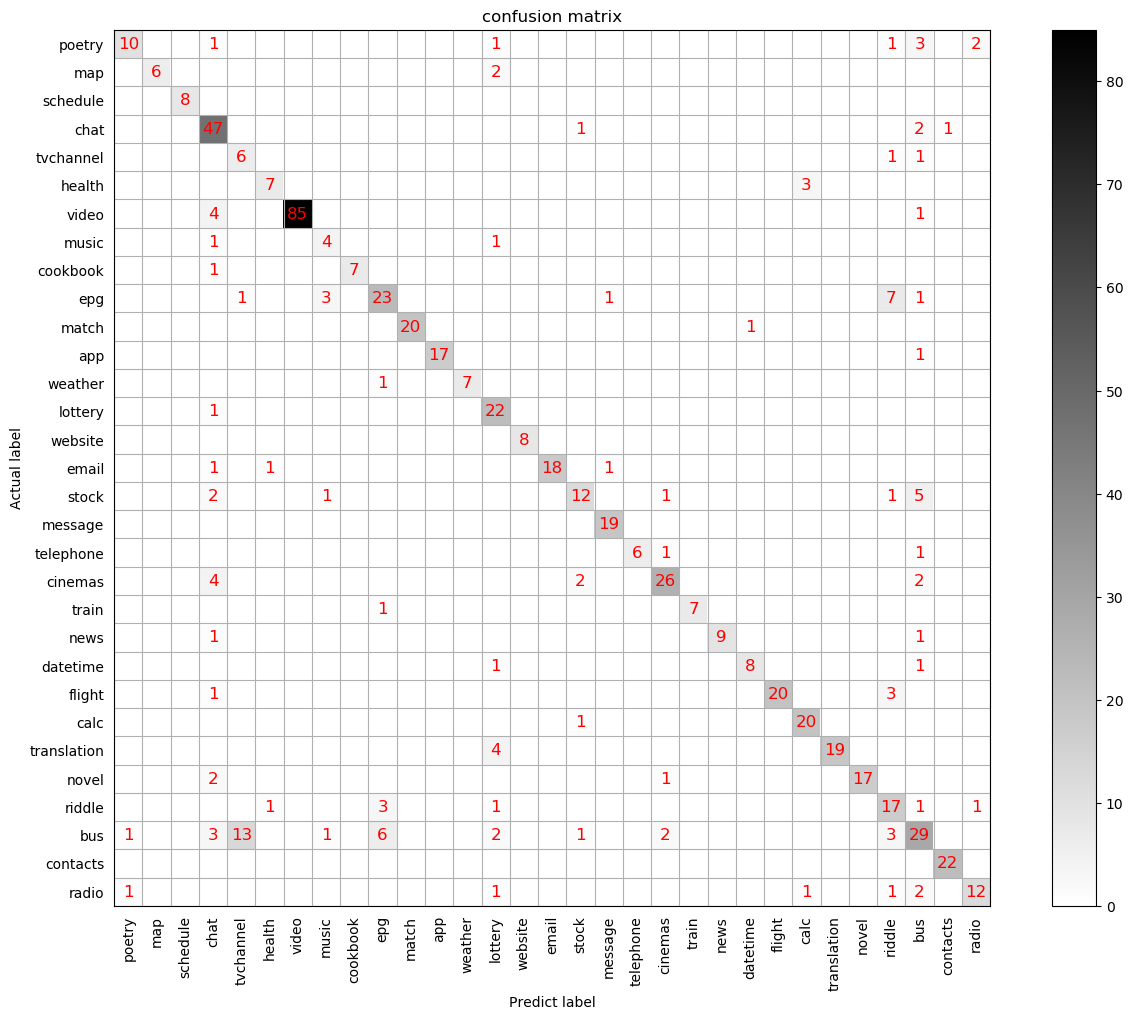

In [92]:

y_test = test_data['num_label'].to_list()
y_pred = gnb.predict(test_data_embeddings)
labels_list = labels.to_list()
y_test = [labels_list[int(i)] for i in y_test]
y_pred = [labels_list[int(i)] for i in y_pred]

# 获取混淆矩阵
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(cm, labels_list, 'confusion_matrix.png', title='confusion matrix')

In [98]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=0.1, hidden_layer_sizes=(15,), random_state=1, max_iter=500)
clf.fit(X, y)

MLPClassifier(alpha=0.1, hidden_layer_sizes=(15,), max_iter=1000,
              random_state=1, solver='lbfgs')

              precision    recall  f1-score   support

         app       0.56      0.56      0.56        18
         bus       1.00      0.88      0.93         8
        calc       0.89      1.00      0.94         8
        chat       0.75      0.98      0.85        51
     cinemas       0.62      0.62      0.62         8
    contacts       0.90      0.90      0.90        10
    cookbook       0.99      0.93      0.96        90
    datetime       0.67      0.67      0.67         6
       email       1.00      0.88      0.93         8
         epg       0.72      0.78      0.75        36
      flight       0.95      1.00      0.98        21
      health       0.89      0.89      0.89        18
     lottery       0.88      0.88      0.88         8
         map       0.85      0.96      0.90        23
       match       0.78      0.88      0.82         8
     message       1.00      0.86      0.92        21
       music       0.75      0.55      0.63        22
        news       0.86    

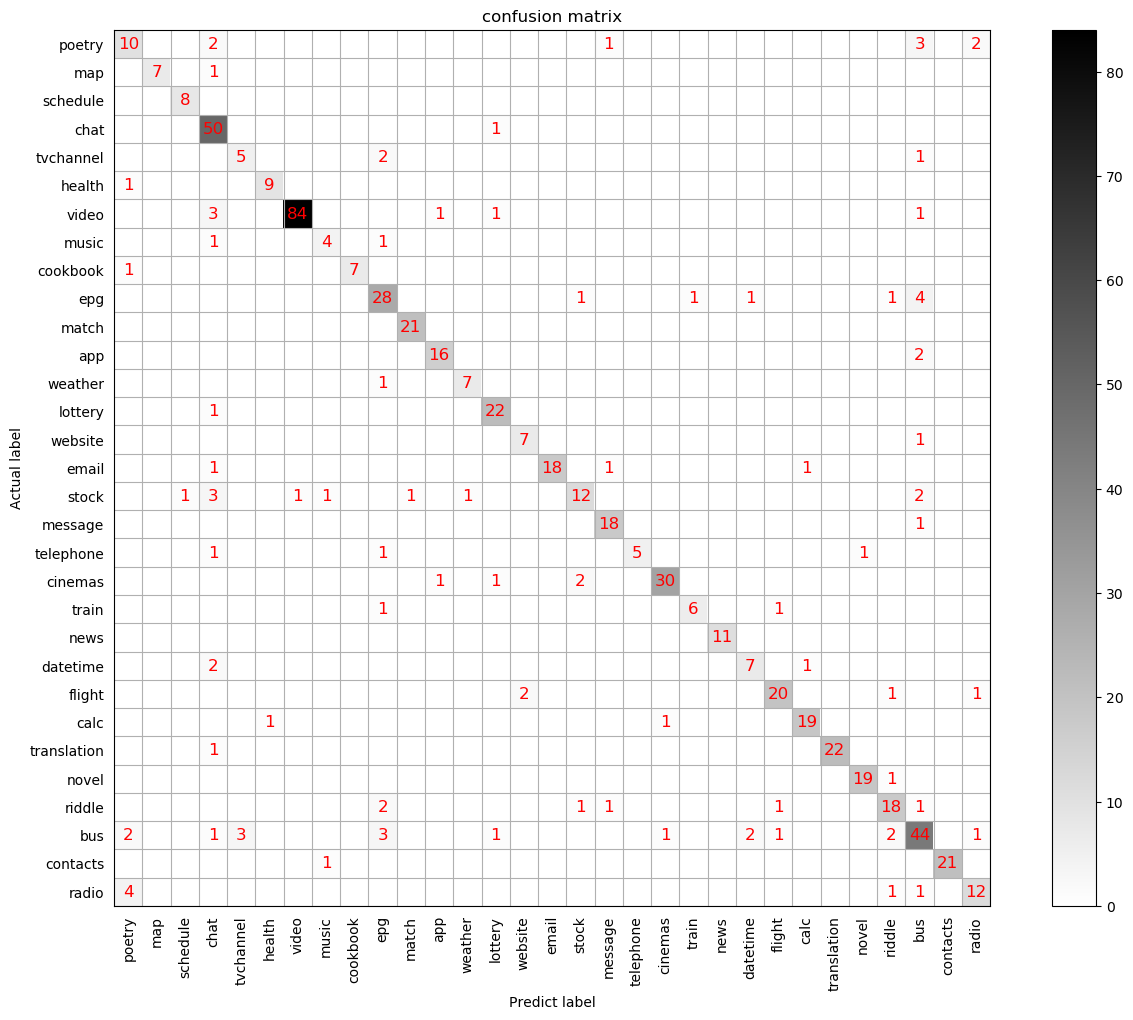

In [99]:
y_test = test_data['num_label'].to_list()
y_pred = clf.predict(test_data_embeddings)
labels_list = labels.to_list()
y_test = [labels_list[int(i)] for i in y_test]
y_pred = [labels_list[int(i)] for i in y_pred]

# 获取混淆矩阵
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(cm, labels_list, 'confusion_matrix.png', title='confusion matrix')